In [1]:
import glob,os
import baltic as bt

flight_path='/Users/evogytis/Downloads/IATA_Cameroon-to-World_airport-level_Dec2020-Feb2021.csv'

data={}
for line in open(flight_path,'r'):
    l=line.strip('\n').split('\t')
#     print(l)
    if l[0]=='Date':
        header={x: i for i,x in enumerate(l)}
        print(header)
    else:
        if l[0]!='':
            destination=l[header['Destination Country']]
            date=l[header['Date']]
            
            volume=int(l[header['Total Volume']].replace(',',''))
            
            if date not in data: data[date]={}
            
            if destination!='':
                if destination not in data[date]: data[date][destination]=0
                    
                data[date][destination]+=volume
#             data[l[0]]={'to': , 
#                         'volume': int(l[header['Direct Volume']].replace(',',''))}
        
print(data.keys())

countries=set(sum([list(data[d].keys()) for d in data],[]))
sorted_countries=sorted(countries,key=lambda k: -sum([data[d][k] for d in data if k in data[d]]))
print(sorted_countries)


xs=range(len(sorted_countries))
ys=[sum([data[d][k] if k in data[d] else 0.0 for d in data]) for k in sorted_countries]

xs,ys,xlabels=zip(*[(x,y,l) for x,y,l in zip(xs,ys,sorted_countries) if y>=100])

genomes={}
b1620={}

continent={}

for line in open('/Users/evogytis/Downloads/metadata_2021-04-30_13-06.tsv','r'):
    l=line.strip('\n').split('\t')
    
#     print(l)
    if l[0]=='strain':
        header={x: i for i,x in enumerate(l)}
    else:
        country=l[header['country']]
        region=l[header['region']]
        date=l[header['date']]
        
        if country=='USA': country='United States'
        if country=="Côte d'Ivoire": country="Cote D'Ivoire"
        if country=='Democratic Republic of the Congo': country='Congo (Kinshasa)'
        if country=='Republic of the Congo': country='Congo (Brazzaville)'
        
        continent[country]=region
        
#         if country=='Central African Republic': country='Central African Rep'
        lin=l[header['pango_lineage']]
        
#         if country=="Cote d'Ivoire":
#             print(country,country in xlabels)
        
        if country in xlabels:
            if country not in genomes: genomes[country]=0
            if country not in b1620: b1620[country]=0
    
        if len(date)==10 and bt.decimalDate(date.replace('-XX',''),variable=True)>=bt.decimalDate('2021-01-01'):
            if country in xlabels:
                genomes[country]+=1
                if lin=='B.1.620':
                    b1620[country]+=1
                
print(genomes)
genomes['Central African Rep']=0
genomes['Chad']=0
genomes['Niger']=0
genomes['Swaziland']=0

continent['Central African Rep']='Africa'
continent['Chad']='Africa'
continent['Niger']='Africa'
continent['Swaziland']='Africa'

colours={}
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/colours.csv','r'):
    loc,colour=line.strip('\n').split('\t')
    colours[loc]=colour

colours['South America']=colours['SouthAmerica']
colours['North America']=colours['NorthAmerica']

print(b1620)

{'Date': 0, 'Origin Airport': 1, 'OriginCity': 2, 'Origin Country': 3, 'Destination Airport': 4, 'DestCity': 5, 'Destination Country': 6, 'Total Volume': 7, 'Direct Volume': 8, 'Destination Lat': 9, 'Destination Long': 10, 'Origin Lat': 11, 'Origin Long': 12}
dict_keys(['December-2020', 'January-2021', 'February-2021'])
['France', 'United States', 'Central African Rep', 'United Arab Emirates', 'Ethiopia', 'Chad', "Cote D'Ivoire", 'Belgium', 'Gabon', 'Congo (Brazzaville)', 'Benin', 'Switzerland', 'Canada', 'Senegal', 'Germany', 'Turkey', 'Kenya', 'Togo', 'Rwanda', 'United Kingdom', 'Italy', 'Egypt', 'Nigeria', 'Morocco', 'South Africa', 'Spain', 'Ghana', 'Mali', 'Congo (Kinshasa)', 'Tunisia', 'Niger', 'Lebanon', 'China', 'Ukraine', 'Bahrain', 'Cyprus', 'Burkina Faso', 'Russia', 'Portugal', 'Equatorial Guinea', 'Belarus', 'Swaziland', 'India', 'Netherlands', 'Philippines', 'Guinea', 'Sweden', 'Uganda', 'Poland', 'Korea (South)', 'Saudi Arabia', 'Finland', 'Austria', 'Denmark', 'Norway', 

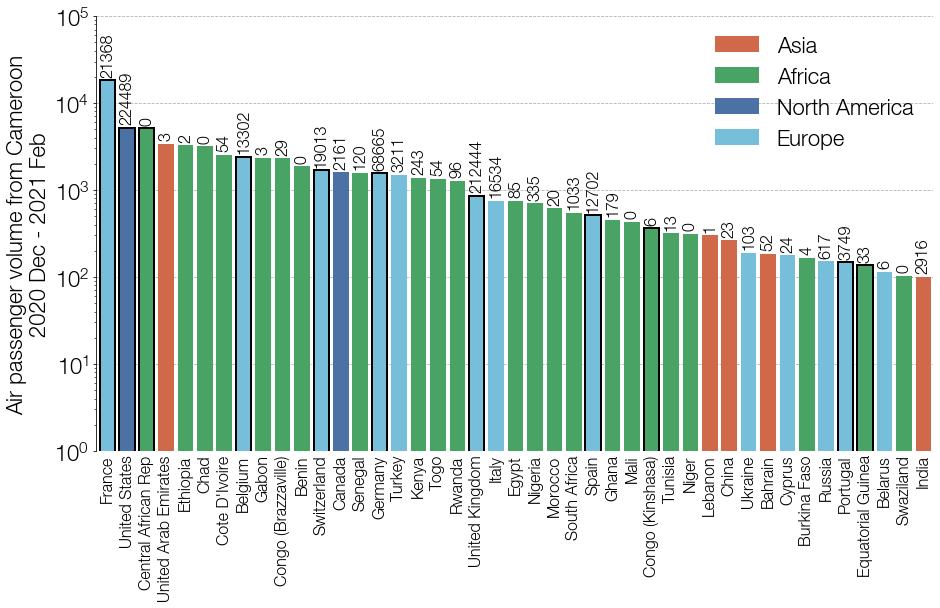

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
# import matplotlib.patheffects as path_effects
from matplotlib.patches import Rectangle,Polygon
from matplotlib.gridspec import GridSpec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42

import numpy as np

fig = plt.subplots(figsize=(15,8),facecolor='w')
# gs = GridSpec(3,1,hspace=0.01,wspace=0.01)
gs = GridSpec(1,1,hspace=0.01,wspace=0.01)


ax=plt.subplot(gs[0])

detections={'France', 'Germany', 'Belgium', 'Switzerland', 'United Kingdom', 'Spain', 'Ireland', 'Portugal', 
            'Central African Rep', 'Equatorial Guinea', 'Congo (Kinshasa)',
            'United States'}

for x,y,l in zip(xs,ys,xlabels):
    fc=colours[continent[l]]
    ec='none'
#     print(l,l=='Congo (Kinshasa)')
    if l in detections:
        ec='k'
#         print(l=='Congo (Kinshasa)')
    ax.bar(x,y,facecolor=fc,edgecolor=ec,lw=2,label=continent[l] if continent[l] not in ax.get_legend_handles_labels()[1] and ec!='k' else '',zorder=100)


ax.legend(loc='upper right',frameon=False)

for x,y,country in zip(xs,ys,xlabels):
    ax.text(x,y*1.1,genomes[country],size=16,rotation=90,ha='center',va='bottom')
    
ax.set_yscale('log')

ax.tick_params(axis='x',size=0)
[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['left']]

ax.set_ylabel('Air passenger volume from Cameroon\n2020 Dec - 2021 Feb')

ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels,rotation=90,size=16)

ax.set_xlim(-0.6,len(xlabels)-0.5)
ax.set_ylim(1,1e5)

ax.grid(axis='y',ls='--',zorder=0)
plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/figures/Fig5_passengers.png',dpi=100,bbox_inches='tight')
plt.show()

In [3]:
print(xlabels)

('France', 'United States', 'Central African Rep', 'United Arab Emirates', 'Ethiopia', 'Chad', "Cote D'Ivoire", 'Belgium', 'Gabon', 'Congo (Brazzaville)', 'Benin', 'Switzerland', 'Canada', 'Senegal', 'Germany', 'Turkey', 'Kenya', 'Togo', 'Rwanda', 'United Kingdom', 'Italy', 'Egypt', 'Nigeria', 'Morocco', 'South Africa', 'Spain', 'Ghana', 'Mali', 'Congo (Kinshasa)', 'Tunisia', 'Niger', 'Lebanon', 'China', 'Ukraine', 'Bahrain', 'Cyprus', 'Burkina Faso', 'Russia', 'Portugal', 'Equatorial Guinea', 'Belarus', 'Swaziland', 'India')
